## Basic Clustering

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

### Load the Data

In [2]:
df=pd.read_csv('datasets/Country clusters.csv')
len(df)

6

In [3]:
df

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


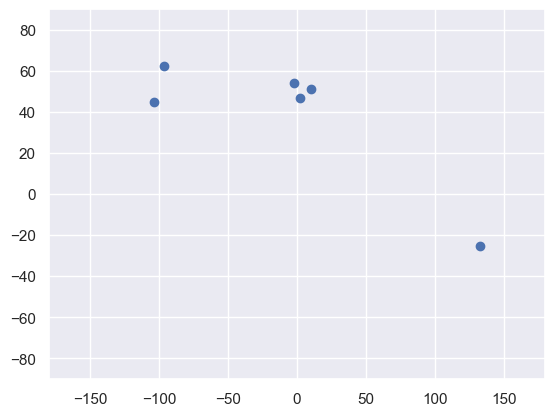

In [4]:
plt.scatter(df['Longitude'],df['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### Select Features

In [5]:
x=df.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


### Clustering

In [6]:
km=KMeans(2)

In [7]:
km.fit(x)

c:\Users\Ghost\anaconda3\envs\class\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

### Clustering results

In [8]:
identify_clusters=km.fit_predict(x)
identify_clusters

c:\Users\Ghost\anaconda3\envs\class\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 1])

In [9]:
data_with_clusters=df.copy()
data_with_clusters['Clusters']=identify_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


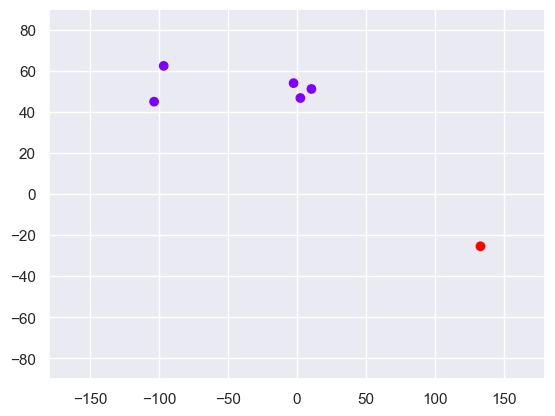

In [14]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### Cluster with 3

c:\Users\Ghost\anaconda3\envs\class\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ghost\anaconda3\envs\class\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


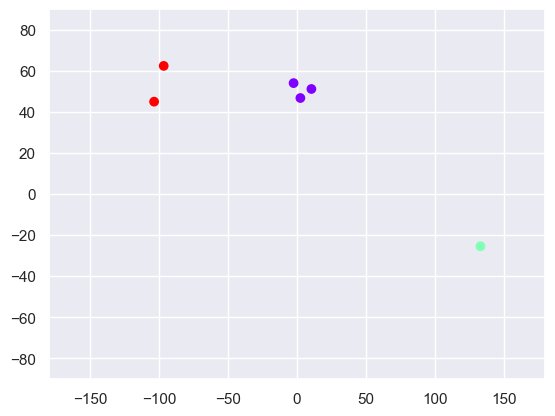

In [19]:
km=KMeans(3)
km.fit(x)
identify_clusters=km.fit_predict(x)
data_with_clusters=df.copy()
data_with_clusters['Clusters']=identify_clusters
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### Map Language

In [20]:
df['Language']=df['Language'].map({'English':0,'French':1,'German':2})

In [21]:
df

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


### Select Features

In [24]:
x=df.iloc[:,2:3]

In [27]:
km=KMeans(3)
km.fit(x)

c:\Users\Ghost\anaconda3\envs\class\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

### Clustering

In [30]:
data_with_clusters['Clusters']=km.predict(x)
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,2


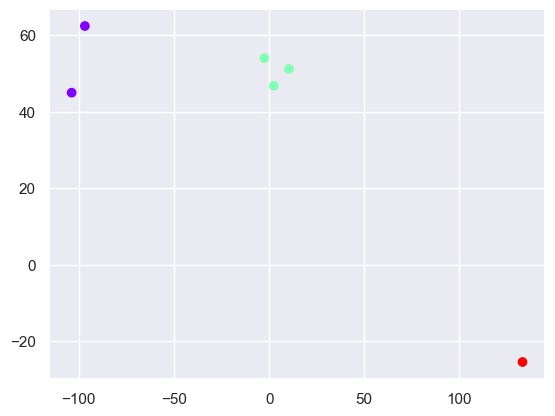

In [31]:
plt.scatter(df['Longitude'],df['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')

### WCS

In [32]:
km.inertia_

109.45371666666666

In [34]:
wcss=[]
for i in range(1,7):
    km=KMeans(i)
    km.fit(x)
    wcss.append(km.inertia_)


c:\Users\Ghost\anaconda3\envs\class\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ghost\anaconda3\envs\class\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ghost\anaconda3\envs\class\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ghost\anaconda3\envs\class\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMe

In [35]:
wcss

[37431.92988333333,
 12723.427350000004,
 109.45371666666666,
 36.442899999999995,
 12.152449999999998,
 0.0]

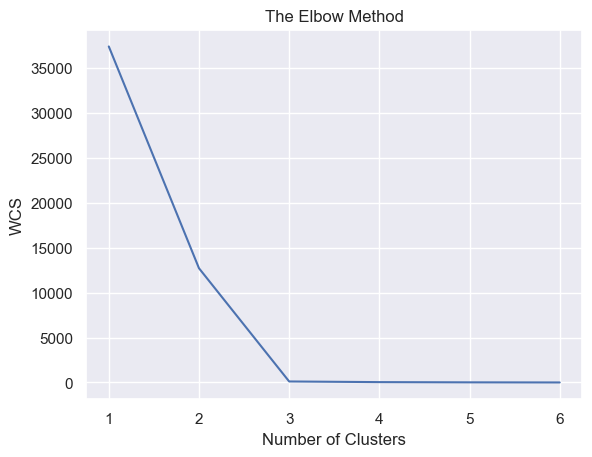

In [37]:
number_cluster=range(1,7)
plt.plot(number_cluster,wcss)
plt.title('The Elbow Method')
plt.ylabel('WCS')
plt.xlabel('Number of Clusters')
plt.show()